In [58]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv(
    '../datasets/C_17_dataset_190_0_upFile.csv',
    delimiter=";",
    skiprows=3,
    keep_default_na=False)

In [60]:
df.loc[df.Utenti == '']

,Anno,Codice regione,Descrizione Regione,Codice ASL,ASL,SERD,Categoria Sostanza,Utenti
40,2022,10,PIEMONTE,210,CN1,A01,OPPIACEI,
44,2022,10,PIEMONTE,210,CN1,S06,OPPIACEI,
62,2022,10,PIEMONTE,301,ASL CITTA' DI TORINO,A02,OPPIACEI,
97,2022,30,LOMBARDIA,706,ASST RHODENSE,S01,OPPIACEI,
277,2022,90,TOSCANA,201,AZIENDA USL TOSCANA CENTRO,S24,OPPIACEI,
...,...,...,...,...,...,...,...,...
2773,2022,200,SARDEGNA,201,AZIENDA PER LA TUTELA DELLA SALUTE,S05,ALTRE SOSTANZE,
2774,2022,200,SARDEGNA,201,AZIENDA PER LA TUTELA DELLA SALUTE,S06,ALTRE SOSTANZE,
2775,2022,200,SARDEGNA,201,AZIENDA PER LA TUTELA DELLA SALUTE,S12,ALTRE SOSTANZE,
2776,2022,200,SARDEGNA,201,AZIENDA PER LA TUTELA DELLA SALUTE,S14,ALTRE SOSTANZE,


In [61]:
df = df.replace(r'^\s*$', np.nan, regex=True)

In [62]:
df.loc[df.Utenti == '']

,Anno,Codice regione,Descrizione Regione,Codice ASL,ASL,SERD,Categoria Sostanza,Utenti


In [63]:
df.Utenti = df.Utenti.astype(float)

<Axes: xlabel='Descrizione Regione'>

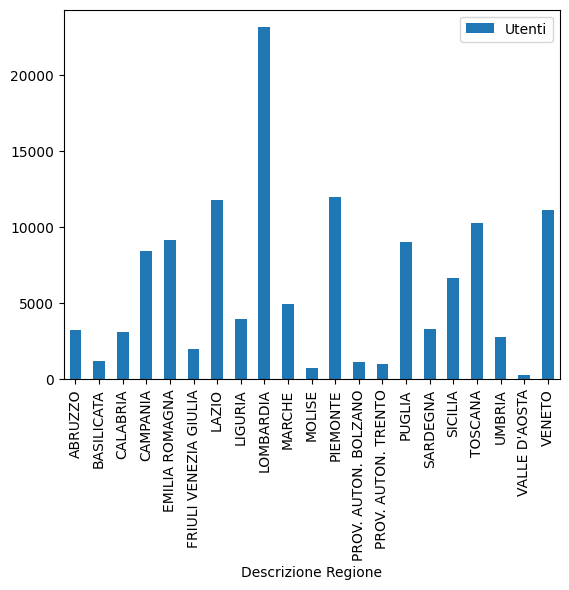

In [64]:
df[['Descrizione Regione', 'Utenti']].groupby('Descrizione Regione').sum().plot.bar()

In [65]:
regions_df = gpd.read_file('../datasets/limits_IT_regions.geojson')

In [66]:
regions_df.head()

,reg_name,reg_istat_code_num,reg_istat_code,geometry
0,Piemonte,1,01,"POLYGON ((7.13605 45.27996, 7.13601 45.28040, ..."
1,Valle d'Aosta/Vallée d'Aoste,2,02,"POLYGON ((7.73455 45.92365, 7.73590 45.92744, ..."
2,Lombardia,3,03,"MULTIPOLYGON (((8.57964 45.75172, 8.57532 45.7..."
3,Trentino-Alto Adige/Südtirol,4,04,"POLYGON ((12.01396 46.55091, 12.01376 46.55077..."
4,Veneto,5,05,"POLYGON ((10.63538 45.53543, 10.63228 45.56846..."


In [67]:
regions_df['reg_name'] = regions_df['reg_name'].map(lambda x: x.lower())

In [68]:
regions_df.loc[regions_df["reg_name"] == "valle d'aosta/vallée d'aoste", "reg_name"] = "valle d'aosta"

In [69]:
regions_df.loc[regions_df["reg_name"] == "trentino-alto adige/südtirol", "reg_name"] = "trentino-alto adige"

In [70]:
regions_df['reg_name'] = regions_df['reg_name'].map(lambda x: x.replace("-", " "))

In [71]:
regions_df['reg_name']

0                  piemonte
1             valle d'aosta
2                 lombardia
3       trentino alto adige
4                    veneto
5     friuli venezia giulia
6                   liguria
7            emilia romagna
8                   toscana
9                    umbria
10                   marche
11                    lazio
12                  abruzzo
13                   molise
14                 campania
15                   puglia
16               basilicata
17                 calabria
18                  sicilia
19                 sardegna
Name: reg_name, dtype: object

In [72]:
df['Descrizione Regione'].unique()

array(['PIEMONTE', "VALLE D'AOSTA", 'LOMBARDIA', 'PROV. AUTON. BOLZANO',
       'PROV. AUTON. TRENTO', 'VENETO', 'FRIULI VENEZIA GIULIA',
       'LIGURIA', 'EMILIA ROMAGNA', 'TOSCANA', 'UMBRIA', 'MARCHE',
       'LAZIO', 'ABRUZZO', 'MOLISE', 'CAMPANIA', 'PUGLIA', 'BASILICATA',
       'CALABRIA', 'SICILIA', 'SARDEGNA'], dtype=object)

In [73]:
df.loc[df["Descrizione Regione"] == 'PROV. AUTON. BOLZANO', "Descrizione Regione"] = 'trentino-alto adige'

In [74]:
df.loc[df["Descrizione Regione"] == 'PROV. AUTON. TRENTO', "Descrizione Regione"] = 'trentino-alto adige'

In [75]:
df['Descrizione Regione'] = df['Descrizione Regione'].str.lower()

In [76]:
df['Descrizione Regione'] = df['Descrizione Regione'].map(lambda x: x.replace("-", " "))

In [77]:
df = df.rename(columns={"Descrizione Regione": "reg_name"})

In [78]:
df

,Anno,Codice regione,reg_name,Codice ASL,ASL,SERD,Categoria Sostanza,Utenti
0,2022,10,piemonte,203,TO3,A12,OPPIACEI,1.0
1,2022,10,piemonte,203,TO3,B01,OPPIACEI,3.0
2,2022,10,piemonte,203,TO3,B03,OPPIACEI,40.0
3,2022,10,piemonte,203,TO3,S01,OPPIACEI,124.0
4,2022,10,piemonte,203,TO3,S02,OPPIACEI,104.0
...,...,...,...,...,...,...,...,...
2775,2022,200,sardegna,201,AZIENDA PER LA TUTELA DELLA SALUTE,S12,ALTRE SOSTANZE,NaN
2776,2022,200,sardegna,201,AZIENDA PER LA TUTELA DELLA SALUTE,S14,ALTRE SOSTANZE,NaN
2777,2022,200,sardegna,201,AZIENDA PER LA TUTELA DELLA SALUTE,S21,ALTRE SOSTANZE,NaN
2778,2022,200,sardegna,302,ASL N. 2 DELLA GALLURA,S06,ALTRE SOSTANZE,1.0


In [79]:
df_agg = df.groupby([
    "Anno",
    "Codice regione",
    'reg_name',
    "Categoria Sostanza"
]).sum().reset_index()

In [80]:
df_agg

,Anno,Codice regione,reg_name,Categoria Sostanza,Codice ASL,ASL,SERD,Utenti
0,2022,10,piemonte,ALLUCINOGENI,211,CN2,S02,0.0
1,2022,10,piemonte,ALTRE DIPENDENZE,3909,TO3TO3TO3TO4TO5TO5CN1CN1CN2ATALALALASL CITTA' ...,S02 S13 ...,18.0
2,2022,10,piemonte,ALTRE SOSTANZE,4853,TO3TO3TO3TO3TO3TO4VCBIBIVCOVCOVCOCN1CN1ATALALA...,S02 S11 ...,18.0
3,2022,10,piemonte,CANNABINOIDI,16162,TO3TO3TO3TO3TO3TO3TO3TO3TO3TO3TO3TO3TO3TO4TO4T...,A12 A18 ...,1395.0
4,2022,10,piemonte,COCAINA,16766,TO3TO3TO3TO3TO3TO3TO3TO3TO3TO3TO3TO3TO3TO4TO4T...,A12 A18 ...,2765.0
...,...,...,...,...,...,...,...,...
157,2022,200,sardegna,CANNABINOIDI,8590,AZIENDA PER LA TUTELA DELLA SALUTEAZIENDA PER ...,S01 S03 ...,315.0
158,2022,200,sardegna,COCAINA,8590,AZIENDA PER LA TUTELA DELLA SALUTEAZIENDA PER ...,S01 S03 ...,460.0
159,2022,200,sardegna,IPNOTICI E SEDATIVI,2843,AZIENDA PER LA TUTELA DELLA SALUTEAZIENDA PER ...,S10 S14 ...,11.0
160,2022,200,sardegna,OPPIACEI,8789,AZIENDA PER LA TUTELA DELLA SALUTEAZIENDA PER ...,S01 S02 ...,2534.0


In [81]:
df_agg_serd = df.groupby([
    'reg_name',
]).count().reset_index()

In [82]:
df_agg_serd

,reg_name,Anno,Codice regione,Codice ASL,ASL,SERD,Categoria Sostanza,Utenti
0,abruzzo,43,43,43,43,43,43,40
1,basilicata,22,22,22,22,22,22,22
2,calabria,51,51,51,51,51,51,49
3,campania,162,162,162,162,162,162,139
4,emilia romagna,236,236,236,236,236,236,216
5,friuli venezia giulia,66,66,66,66,66,66,45
6,lazio,233,233,233,233,233,233,221
7,liguria,86,86,86,86,86,86,81
8,lombardia,402,402,402,402,402,402,374
9,marche,80,80,80,80,80,80,75


In [83]:
regions_df = regions_df.merge(df_agg)

In [84]:
regions_df

,reg_name,reg_istat_code_num,reg_istat_code,geometry,Anno,Codice regione,Categoria Sostanza,Codice ASL,ASL,SERD,Utenti
0,piemonte,1,01,"POLYGON ((7.13605 45.27996, 7.13601 45.28040, ...",2022,10,ALLUCINOGENI,211,CN2,S02,0.0
1,piemonte,1,01,"POLYGON ((7.13605 45.27996, 7.13601 45.28040, ...",2022,10,ALTRE DIPENDENZE,3909,TO3TO3TO3TO4TO5TO5CN1CN1CN2ATALALALASL CITTA' ...,S02 S13 ...,18.0
2,piemonte,1,01,"POLYGON ((7.13605 45.27996, 7.13601 45.28040, ...",2022,10,ALTRE SOSTANZE,4853,TO3TO3TO3TO3TO3TO4VCBIBIVCOVCOVCOCN1CN1ATALALA...,S02 S11 ...,18.0
3,piemonte,1,01,"POLYGON ((7.13605 45.27996, 7.13601 45.28040, ...",2022,10,CANNABINOIDI,16162,TO3TO3TO3TO3TO3TO3TO3TO3TO3TO3TO3TO3TO3TO4TO4T...,A12 A18 ...,1395.0
4,piemonte,1,01,"POLYGON ((7.13605 45.27996, 7.13601 45.28040, ...",2022,10,COCAINA,16766,TO3TO3TO3TO3TO3TO3TO3TO3TO3TO3TO3TO3TO3TO4TO4T...,A12 A18 ...,2765.0
...,...,...,...,...,...,...,...,...,...,...,...
157,sardegna,20,20,"MULTIPOLYGON (((8.33727 40.49933, 8.33697 40.4...",2022,200,CANNABINOIDI,8590,AZIENDA PER LA TUTELA DELLA SALUTEAZIENDA PER ...,S01 S03 ...,315.0
158,sardegna,20,20,"MULTIPOLYGON (((8.33727 40.49933, 8.33697 40.4...",2022,200,COCAINA,8590,AZIENDA PER LA TUTELA DELLA SALUTEAZIENDA PER ...,S01 S03 ...,460.0
159,sardegna,20,20,"MULTIPOLYGON (((8.33727 40.49933, 8.33697 40.4...",2022,200,IPNOTICI E SEDATIVI,2843,AZIENDA PER LA TUTELA DELLA SALUTEAZIENDA PER ...,S10 S14 ...,11.0
160,sardegna,20,20,"MULTIPOLYGON (((8.33727 40.49933, 8.33697 40.4...",2022,200,OPPIACEI,8789,AZIENDA PER LA TUTELA DELLA SALUTEAZIENDA PER ...,S01 S02 ...,2534.0


In [85]:
regions_df.columns

Index(['reg_name', 'reg_istat_code_num', 'reg_istat_code', 'geometry', 'Anno',
       'Codice regione', 'Categoria Sostanza', 'Codice ASL', 'ASL', 'SERD',
       'Utenti'],
      dtype='object')

<Axes: ylabel='reg_name'>

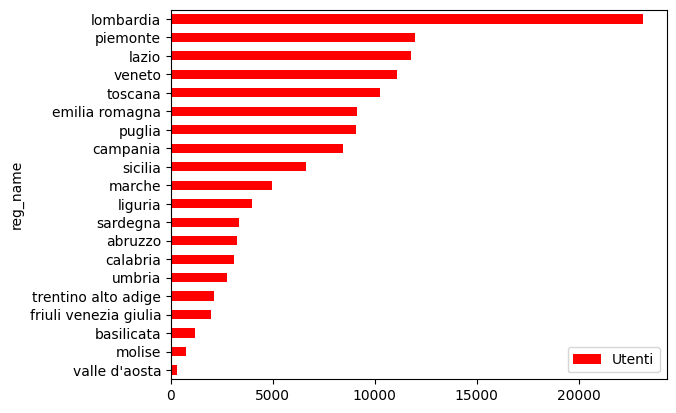

In [86]:
regions_df[["reg_name", 'Utenti']].groupby("reg_name").sum().sort_values(by=['Utenti']).plot(
    kind="barh",
    cmap='autumn'
)

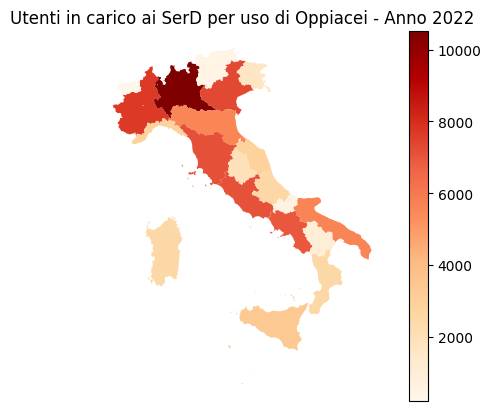

In [87]:
plot_oppiacei = regions_df.loc[regions_df["Categoria Sostanza"] == 'OPPIACEI', ].plot(
    column="Utenti",
    legend=True,
    cmap='OrRd'
);
plt.title("Utenti in carico ai SerD per uso di Oppiacei - Anno 2022")
plot_oppiacei.set_axis_off()

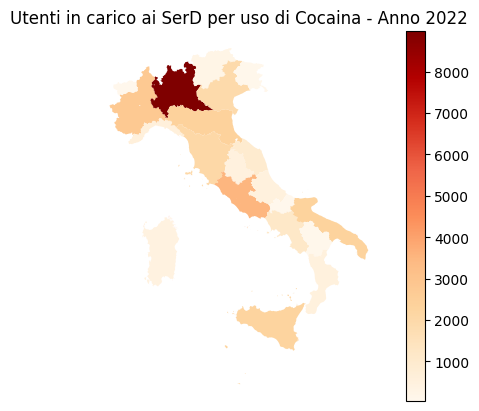

In [88]:
plot_oppiacei = regions_df.loc[regions_df["Categoria Sostanza"] == 'COCAINA', ].plot(
    column="Utenti",
    legend=True,
    cmap='OrRd'
);
plt.title("Utenti in carico ai SerD per uso di Cocaina - Anno 2022")
plot_oppiacei.set_axis_off()